In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.signal import find_peaks

In [86]:
data = pd.read_csv ('C:\\Users\\Asus\\Downloads\\data1.csv', sep = ';')

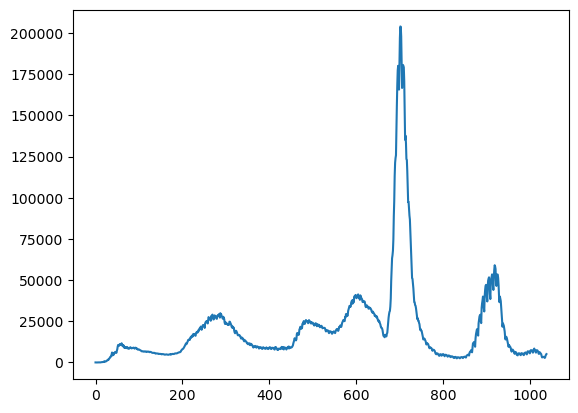

In [185]:

plt.plot(data['Заражений за день'])


# Задание 1

(0.0, 22938996.408951625)

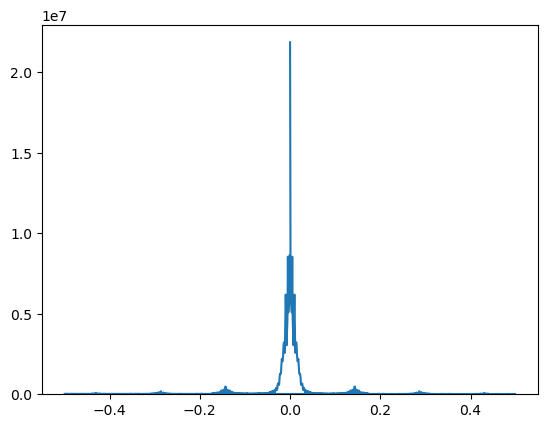

In [207]:
coef = np.fft.fft(data['Заражений за день'])
freq = np.fft.fftfreq(len(data['Заражений за день']), 1/1)
plt.plot(freq,abs(coef))
plt.ylim(0)

Рассмотрим высокочастотные колебания

(0.1, 0.2)

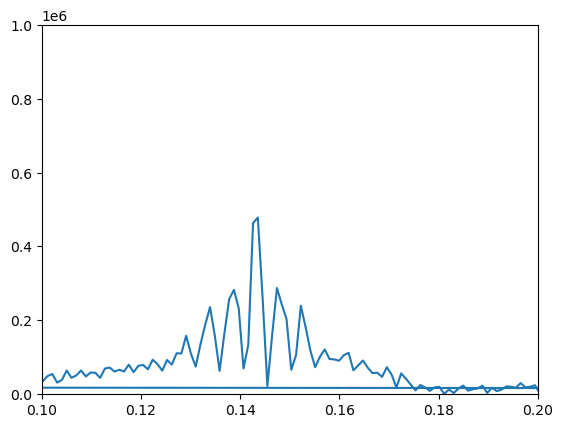

In [222]:
coef = np.fft.fft(data['Заражений за день'])
freq = np.fft.fftfreq(len(data['Заражений за день']), 1/1)
plt.plot(freq,abs(coef))
plt.ylim(0,1000000)
plt.xlim(0.1,0.2)


In [ ]:
T = 1/0.14
T #период около 7 дней

Так как период 7 дней, возьмем небольшой участок графика(3 периода) и проанализируем его.

(8000.0, 45000.0)

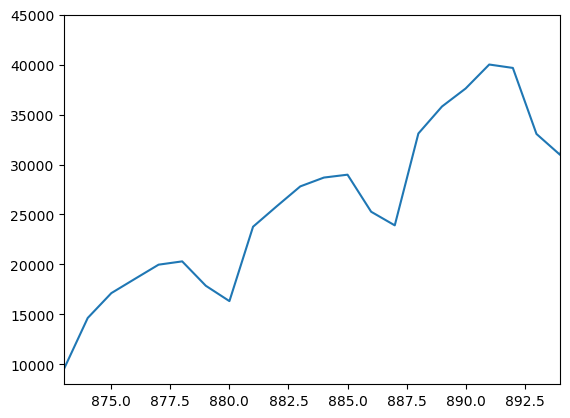

In [187]:

plt.plot(data['Заражений за день'])
plt.xlim(873,894)

plt.ylim(8000,45000)

   Моя гипотеза состоит в том, что если в Мосвке и крупных городах больницы работали в одинаковом режиме и делали одинаковое количество тестов в выходные и будни, то в малых городских центрах количество тестов обработанных за выходные могло быть меньше, чем количество тестов в будни. Соответсвенно мы наблюдаем на график уменьшение количества заболевших/день в течение двух дней.
   
Также это может быть связано с тем, что в выходные меньше людей выходило на работу, соотвественно было меньше контактов заболевших с здоровыми. Инкубационный период ковида около 4 дней, также нужно несколько дней чтобы в лаборатории сделали тест, таким образом можно предположить что от момента контакта до момента выявления заражения проходило около 7 дней. Это я к тому, что время от контаката до выявления заболевания не повлияет на форму графика, просто сдвиг на неделю происходит.

# Задание 2

Для определения дат, соответсвующих максимальным точкам каждой волны заболеваемости воспользуемся функцией find_peaks из пакета scipy.signal. Эмперечески подберем параметры поиска пиков height = 10000 (минимальная значение для пика),  prominence = 3000 (высота пика), width = 30(ширина пика)

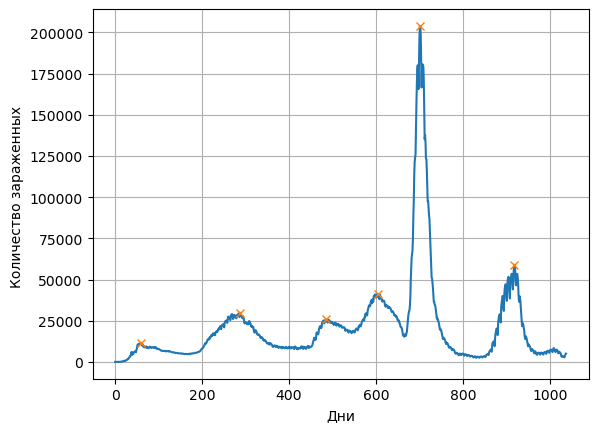

In [112]:
peaks, _ = find_peaks(data['Заражений за день'], height = 10000, prominence = 3000, width = 30)
plt.plot(data['Заражений за день'])
plt.plot(peaks, data['Заражений за день'][peaks], "x")
plt.xlabel('Дни')

plt.ylabel('Количество зараженных ')
plt.grid()
plt.show()

In [91]:
count = 0
for i in peaks:
    count+=1
    print(f'Дата максимума {count} волны короны',data['Дата'][i])

Дата максимума 1 волны короны 2020-05-11 00:00:00
Дата максимума 2 волны короны 2020-12-24 00:00:00
Дата максимума 3 волны короны 2021-07-09 00:00:00
Дата максимума 4 волны короны 2021-11-06 00:00:00
Дата максимума 5 волны короны 2022-02-11 00:00:00
Дата максимума 6 волны короны 2022-09-16 00:00:00
